In [1]:
import xmlrpc.client as xml
import matplotlib.pyplot as plt
import numpy as np

In [2]:
model = 'simulation_modif'
file_type = '.plecs'
plecs = xml.Server('http://localhost:1080/RPC2').plecs

In [3]:
capacitors = np.linspace(5e-6,1600e-6,100)
ripple = []

In [4]:
for c in capacitors:
    plecs.set(model+'/CRU','C',str(c))
    plecs.set(model+'/CRL','C',str(c))
    values = plecs.simulate(model)['Values']
    half = len(values[0])//2
    half_values = values[0][half:]
    ripple.append(abs(max(half_values)-min(half_values))/np.mean(half_values))

In [6]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

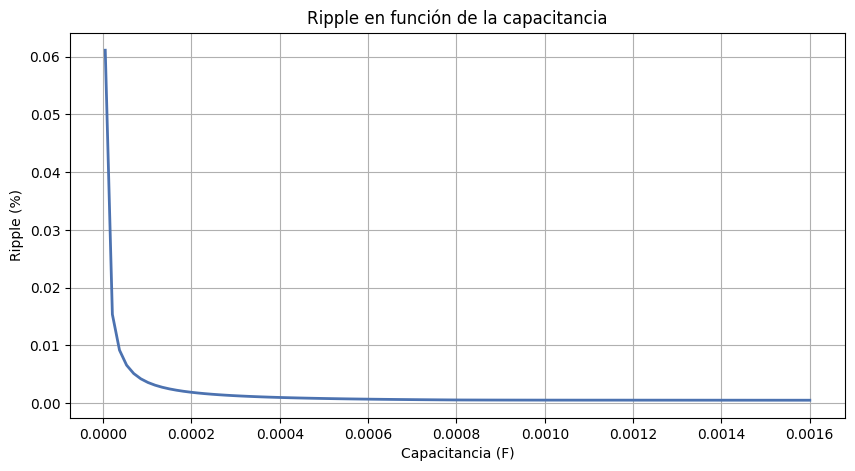

In [12]:
plt.figure(figsize=(10,5))
plt.style.use('seaborn-v0_8-deep')
plt.plot(capacitors,ripple,linewidth=2)
plt.xlabel('Capacitancia (F)')
plt.ylabel('Ripple (%)')
plt.title('Ripple en función de la capacitancia')
plt.grid(True)
plt.savefig('ripple.pdf')

In [11]:
plt.savefig('ripple.pdf')

<Figure size 640x480 with 0 Axes>

In [8]:
plecs.get(model+'/CRU')

{'C': '100e-6',
 'CommentStatus': 'Active',
 'Name': 'CRU',
 'Type': 'Capacitor',
 'v_init': '0'}

In [21]:
values = plecs.simulate(model)['Values']
time = plecs.simulate(model)['Time']

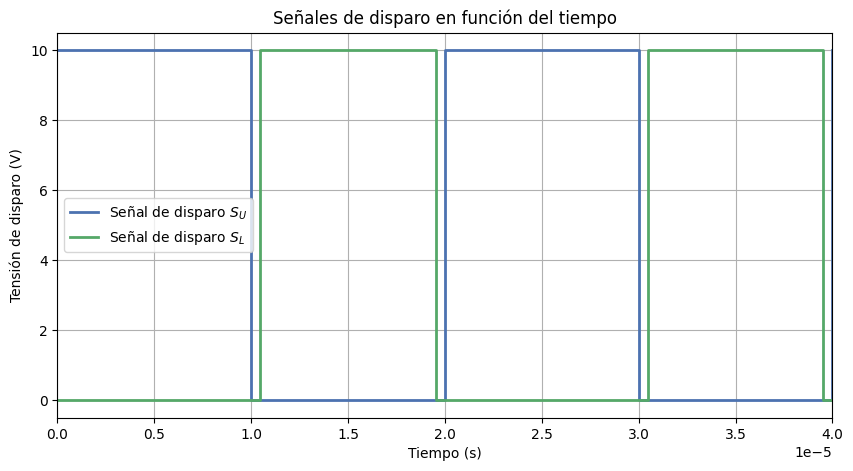

In [20]:
plt.figure(figsize=(10,5))
plt.plot(time,values[2],linewidth=2, label='Señal de disparo $S_U$')
plt.plot(time,values[3],linewidth=2, label='Señal de disparo $S_L$')
plt.xlabel('Tiempo (s)')
plt.ylabel('Tensión de disparo (V)')
plt.title('Señales de disparo en función del tiempo')
plt.legend()
plt.xlim(0,0.00004)
plt.grid(True)
plt.savefig('disparo.pdf')

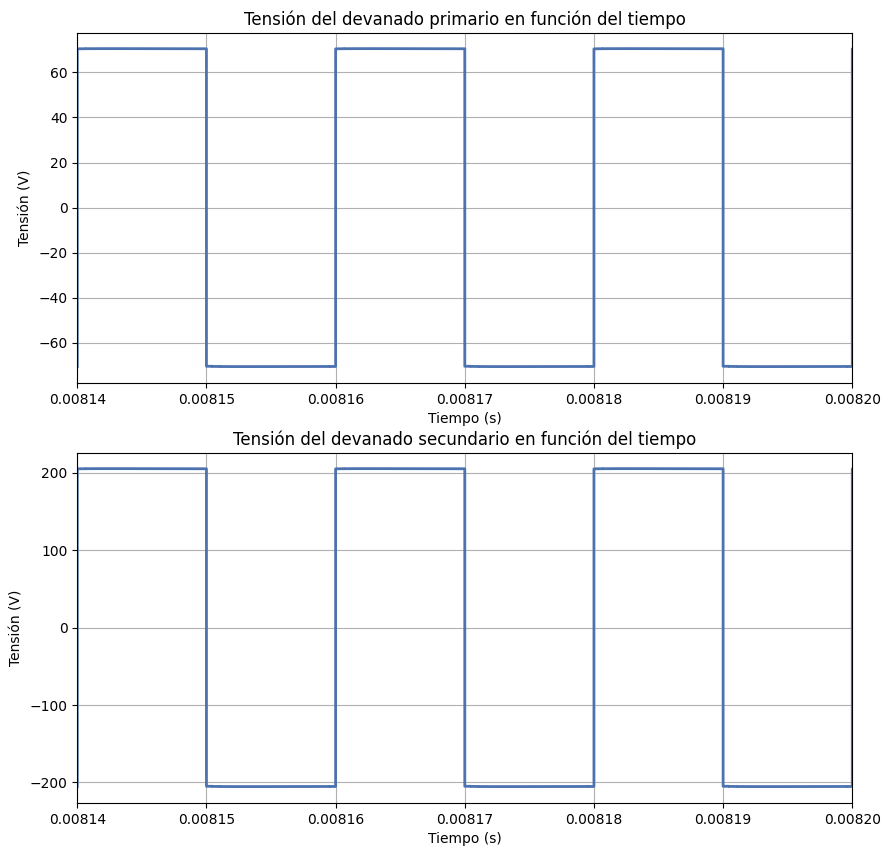

In [25]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(time,values[4],linewidth=2)
plt.ylabel('Tensión (V)')
plt.xlabel('Tiempo (s)')
plt.title('Tensión del devanado primario en función del tiempo')
plt.grid(True)
plt.xlim(8.14e-3,8.2e-3)
plt.subplot(2,1,2)
plt.plot(time,values[6],linewidth=2)
plt.ylabel('Tensión (V)')
plt.xlabel('Tiempo (s)')
plt.title('Tensión del devanado secundario en función del tiempo')
plt.grid(True)
plt.xlim(8.14e-3,8.2e-3)
plt.savefig('tensiones_transformador.pdf')

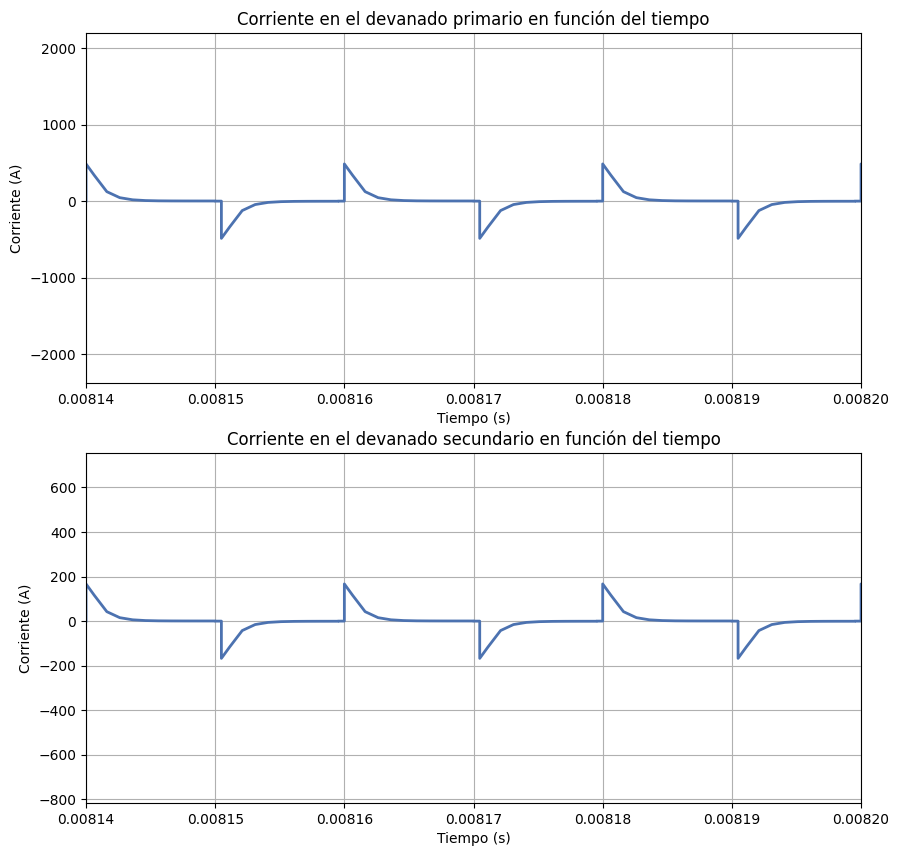

In [26]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(time,values[5],linewidth=2)
plt.ylabel('Corriente (A)')
plt.xlabel('Tiempo (s)')
plt.title('Corriente en el devanado primario en función del tiempo')
plt.grid(True)
plt.xlim(8.14e-3,8.2e-3)
plt.subplot(2,1,2)
plt.plot(time,values[7],linewidth=2)
plt.ylabel('Corriente (A)')
plt.xlabel('Tiempo (s)')
plt.title('Corriente en el devanado secundario en función del tiempo')
plt.grid(True)
plt.xlim(8.14e-3,8.2e-3)
plt.savefig('corrientes_transformador.pdf')

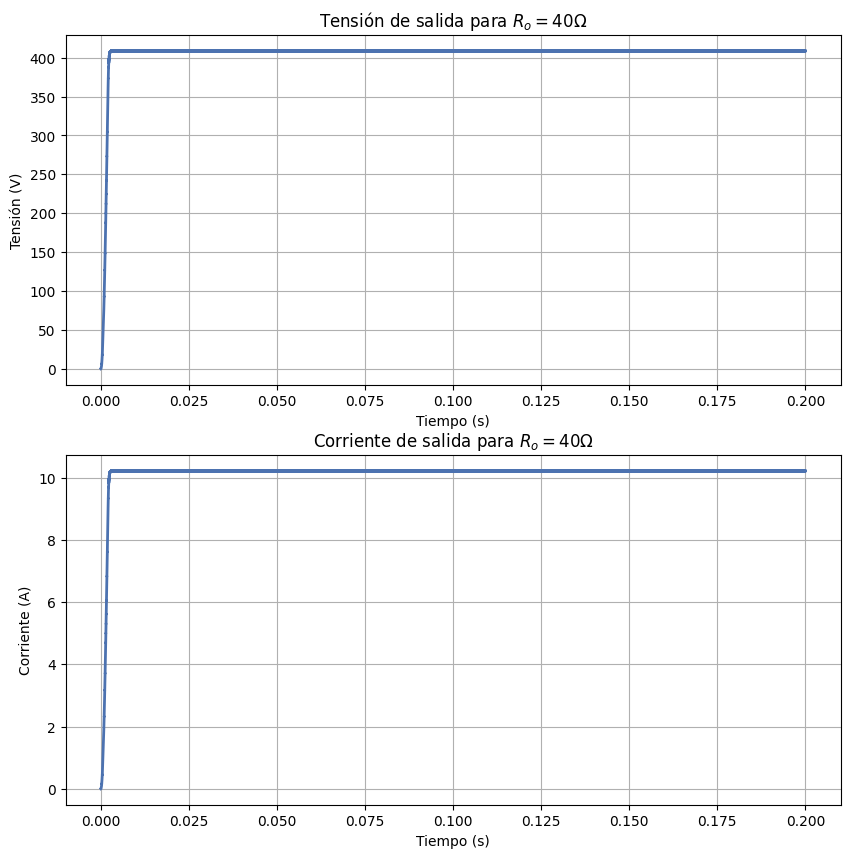

In [28]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(time,values[0],linewidth=2)
plt.ylabel('Tensión (V)')
plt.xlabel('Tiempo (s)')
plt.title('Tensión de salida para $R_o=40\Omega$')
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(time,values[1],linewidth=2)
plt.ylabel('Corriente (A)')
plt.xlabel('Tiempo (s)')
plt.title('Corriente de salida para $R_o=40\Omega$')
plt.grid(True)
plt.savefig('salida_40.pdf')

In [33]:
resistance = np.linspace(40,40000,1000)
v_mean = []
i_mean = []

In [34]:
for r in resistance:
    plecs.set(model+'/Ro','R',str(r))
    values = plecs.simulate(model)['Values']
    half = len(values[0])//2
    half_values = values[0][half:]
    v_mean.append(np.mean(half_values))
    i_mean.append(np.mean(values[1][half:]))

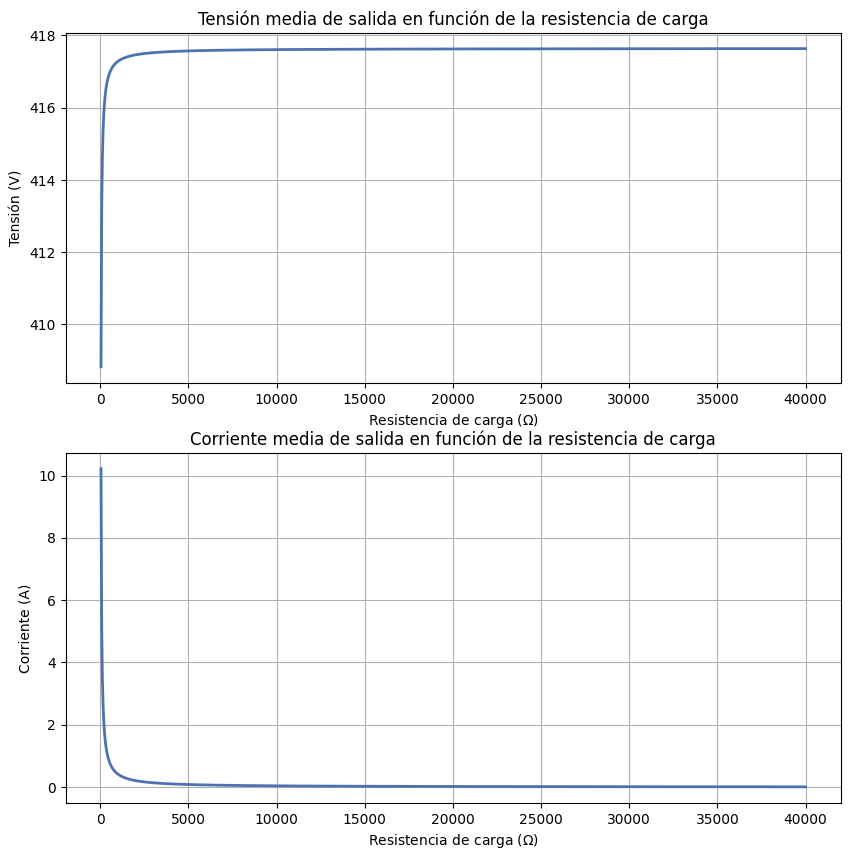

In [36]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(resistance,v_mean,linewidth=2)
plt.ylabel('Tensión (V)')
plt.xlabel('Resistencia de carga ($\Omega$)')
plt.title('Tensión media de salida en función de la resistencia de carga')
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(resistance,i_mean,linewidth=2)
plt.ylabel('Corriente (A)')
plt.xlabel('Resistencia de carga ($\Omega$)')
plt.title('Corriente media de salida en función de la resistencia de carga')
plt.grid(True)
plt.savefig('salida_resistencia.pdf')